<a href="https://colab.research.google.com/github/Joojina/project_final/blob/master/imdb_genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to analyze:
1. 어떤 장르가 제일 인기 있는지
2. 가장 수익을 높이 올린 장르는
3. 국가별 장르 인기 순위
4. 세대별(90/00/10) 장르 인기 순위
5. 장르별 평균 duration


## Some insights

1. 영화 평균 러닝타임 약 107분
2. 가장 긴 영화는 "Carlos" 5시간 38분
3. 가장 인기있는 영화는 "Wonder Woman" 과 "Beauty and the Beast"
4. 예산이 가장 많은 영화는 "Pirates of the Caribbean: On Stranger"
5. 가장 큰 영화 제작자는 Warner Bros와 Universal Pictures
 (유일하게 수익을 창출하는 영화사임)
6. 가장 인기 있는 장르는 Drama, Comedy 

# 데이터 로드
- 81272개의 imdb 자료


In [67]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [74]:
df=pd.read_csv("/gdrive/My Drive/Colab Notebooks/IMDb movies.csv", error_bad_lines=False, encoding='CP949')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 항목
###원천데이터 항목 목록

imdb_title_id,	title,	original_title,	year,	date_published,	genre,	duration,	country,	language,	director,	writer,	production_company,	actors,	description,	avg_vote,	votes,	budget,	usa_gross_income,	worlwide_gross_income,	metascore,	reviews_from_users,	reviews_from_critics

### 사용할 컬럼
movie_title(제목), title_year(개봉년), gene(90/00/10년 세대별), genres(장르), budget(예산), country(국가별), language(언어), income(수익)


In [48]:
df.isnull().sum(axis=1) # 81272개의 imdb 자료

0        4
1        5
2        3
3        4
4        4
        ..
81268    5
81269    4
81270    5
81271    7
81272    6
Length: 81273, dtype: int64

In [76]:
df.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,2250,NaN,NaN,NaN,7.0,7.0


In [0]:
# 사용할 칼럼 ['title', 'original_title', 'year', 'genre', 'country', 'language', 'budget', 'usa_gross_income', 'worlwide_gross_income']
# title(제목), year(개봉년), gene(90/00/10년 세대별), genres(장르), budget(예산), country(국가별), language(언어), income(수익)

In [0]:
df.rename(columns={'title':'제목','year':'개봉년','genre':'장르','country':'국가', 'language':'언어','budget':'예산','usa_gross_income':'수익1-USA','worlwide_gross_income':'수익2-WW'}, inplace=True)

In [46]:
df.isnull().sum(axis=0)

imdb_title_id               0
제목                          0
original_title              0
개봉년                         0
date_published              0
장르                          0
duration                    0
국가                         39
언어                        755
director                   73
writer                   1493
production_company       4325
actors                     66
description              2430
avg_vote                    0
votes                       0
예산                      58469
수익1-usa                 66179
수익2-WW                  51381
metascore               68551
reviews_from_users       7077
reviews_from_critics    10987
dtype: int64

In [0]:
df.drop(0, inplace=True)

In [0]:
df.drop(['imdb_title_id','original_title','date_published','duration','director','writer','production_company','actors','description','avg_vote','votes','metascore','reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

In [79]:
df.isnull().sum(axis=0)

제목             0
개봉년            0
장르             0
국가            39
언어           755
예산         58469
수익1-USA    66179
수익2-WW     51381
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 8 columns):
제목         81273 non-null object
개봉년        81273 non-null int64
장르         81273 non-null object
국가         81234 non-null object
언어         80518 non-null object
예산         22804 non-null object
수익1-USA    15094 non-null object
수익2-WW     29892 non-null object
dtypes: int64(1), object(7)
memory usage: 5.0+ MB


In [0]:
df.fillna('0', inplace=True)

In [0]:
df.drop(['imdb_title_id'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 8 columns):
제목         81273 non-null object
개봉년        81273 non-null int64
장르         81273 non-null object
국가         81273 non-null object
언어         81273 non-null object
예산         81273 non-null object
수익1-USA    81273 non-null object
수익2-WW     81273 non-null object
dtypes: int64(1), object(7)
memory usage: 5.0+ MB


In [83]:
df.head(1)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,0,2250,0,0


In [87]:
df['예산'] = pd.to_numeric(df['예산'])
df['수익1-USA'] = pd.to_numeric(df['수익1-USA'])
df['수익2-WW'] = pd.to_numeric(df['수익2-WW'])

ValueError: ignored

In [0]:
df['예산_국가별'] = df.예산.str.split(' ').str[:]

In [100]:
df.head(10)

,제목,개봉년,장르,국가,언어,예산,수익1-USA,수익2-WW,예산_국가별
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,0,2250,0,0,"[2250, ]"
1,Den sorte dr첩m,1911,Drama,"Germany, Denmark",0,0,0,0,[0]
2,Cleopatra,1912,"Drama, History",USA,English,45000,0,0,"[45000, ]"
3,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,Italian,0,0,0,[0]
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,English,0,0,0,[0]
5,Madame DuBarry,1919,"Biography, Drama, Romance",Germany,German,0,0,0,[0]
6,Quo Vadis?,1913,"Drama, History",Italy,Italian,ITL 45000,0,0,"[ITL, 45000]"
7,Independenta Romaniei,1912,"History, War",Romania,0,ROL 400000,0,0,"[ROL, 400000]"
8,Richard III,1912,Drama,"France, USA",English,30000,0,0,"[30000, ]"
9,Atlantis,1913,Drama,Denmark,Danish,0,0,0,[0]


In [62]:
df['예산']=df['예산'].apply(lambda x: int(x.replace(',','')))
df['수익1-USA']=df['수익1-USA'].apply(lambda x: int(x.replace(',','')))
df['수익2-WW']=df['수익2-WW'].apply(lambda x: int(x.replace(',','')))

ValueError: ignored

In [0]:
# 국가별 수익 상위 10개국

In [85]:
df.groupby('국가')['수익2-WW'].sum().sort_values(ascending=False)[:10]

국가
Nepal, Netherlands, Qatar, USA                                                           NPR 20000000
USA, Germany, Austria                                                                          99967 
Taiwan, Philippines                                                                             9996 
Spain, USA, Canada                                                                           9979800 
Argentina, Spain, Uruguay                                                        99707 190075 481199 
France, Japan                                       99632 006531687 10366360 475852 2305213 190386...
France, Belgium, Czech Republic, Austria                                                      996304 
France, India, Belgium                                                                         99484 
Peru, Argentina, Spain                                                                        994513 
Sweden, Czech Republic, UK, Denmark, Netherlands                               

In [86]:
df.groupby('국가')['수익2-WW'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

TypeError: ignored

In [0]:
# 국가별 개봉영화 갯수 상위 10개국 - bar chart

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)


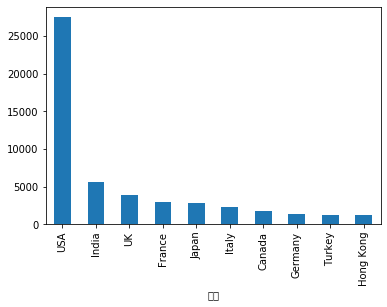

In [88]:
df.groupby('국가')['개봉년'].count().sort_values(ascending=False)[:10].\
plot(kind='bar')

In [0]:
# 장르별 수익 합계

In [89]:
df.groupby('장르')['수익2-WW'].sum().plot(kind='bar')

TypeError: ignored

In [0]:
df.groupby('장르')['수익1-USA'].sum().plot(kind='bar')

In [0]:
# 장르별 수익성

In [0]:
df.groupby('장르')['수익1-USA'].mean().plot(kind='bar')

In [0]:
df.groupby('장르')['수익2-WW'].mean().plot(kind='bar')